# Student Depression Data Analysis

This notebook performs exploratory data analysis and applies multiple machine learning models (Logistic Regression, Random Forest, XGBoost) to the student depression dataset.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [44]:
# --- 1. Load and Explore Data ---
try:
    df = pd.read_csv('student_depression_dataset.csv')
except FileNotFoundError:
    print("Error: 'student_depression_dataset.csv' not found.")
    print("Please make sure the dataset file is in the same directory as the script.")
    # As a fallback for demonstration, create a dummy dataframe
    data = {'id': range(100), 'Gender': ['Male', 'Female']*50, 'Age': np.random.randint(18, 35, 100),
            'City': ['CityA', 'CityB']*50, 'Profession': ['Student']*100, 'Academic Pressure': np.random.randint(1, 6, 100),
            'Work Pressure': [0]*100, 'CGPA': np.random.uniform(5, 10, 100), 'Study Satisfaction': np.random.randint(1, 6, 100),
            'Job Satisfaction': [0]*100, 'Sleep Duration': ['5-6 hours', '7-8 hours', 'Less than 5 hours']*33 + ['5-6 hours'],
            'Dietary Habits': ['Healthy', 'Moderate', 'Unhealthy']*33 + ['Healthy'], 'Degree': ['BSc', 'MSc', 'BA']*33 + ['BSc'],
            'Have you ever had suicidal thoughts ?': ['No', 'Yes']*50, 'Work/Study Hours': np.random.randint(1, 10, 100),
            'Financial Stress': np.random.randint(1, 6, 100), 'Family History of Mental Illness': ['No', 'Yes']*50,
            'Depression': np.random.randint(0, 2, 100)}
    df = pd.DataFrame(data)
    print("\n--- Created a dummy dataframe for demonstration purposes. ---")

print("--- Initial Data Overview ---")
print(df.head())
print("\n--- Data Info ---")
df.info()

--- Initial Data Overview ---
   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'    

In [45]:
# Drop irrelevant columns
df.drop(['id', 'Profession', 'Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

## 2. Exploratory Data Analysis (EDA)


--- Target Variable Distribution (Depression) ---
Depression
1    16336
0    11565
Name: count, dtype: int64


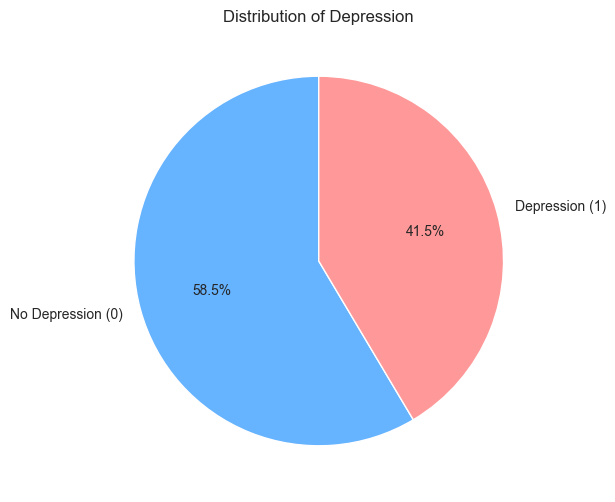

In [46]:
print("\n--- Target Variable Distribution (Depression) ---")
depression_counts = df['Depression'].value_counts()
print(depression_counts)

plt.figure(figsize=(6, 6))
plt.pie(depression_counts, labels=['No Depression (0)', 'Depression (1)'], autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Depression')
plt.show()

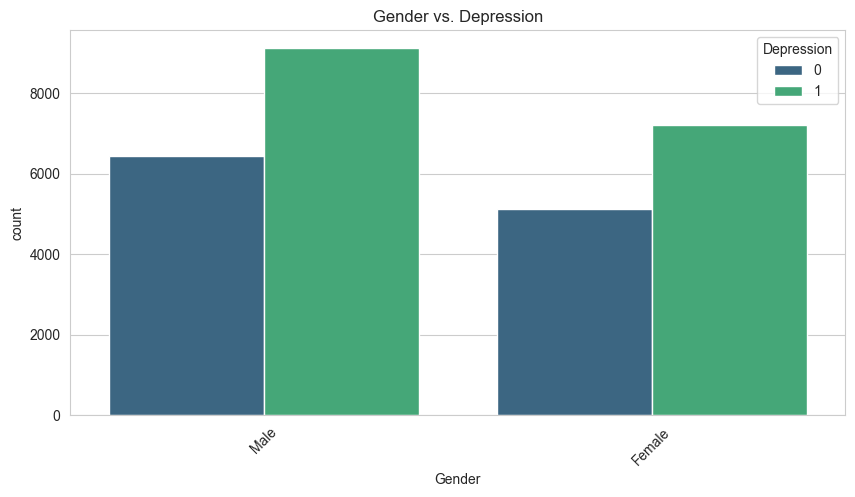

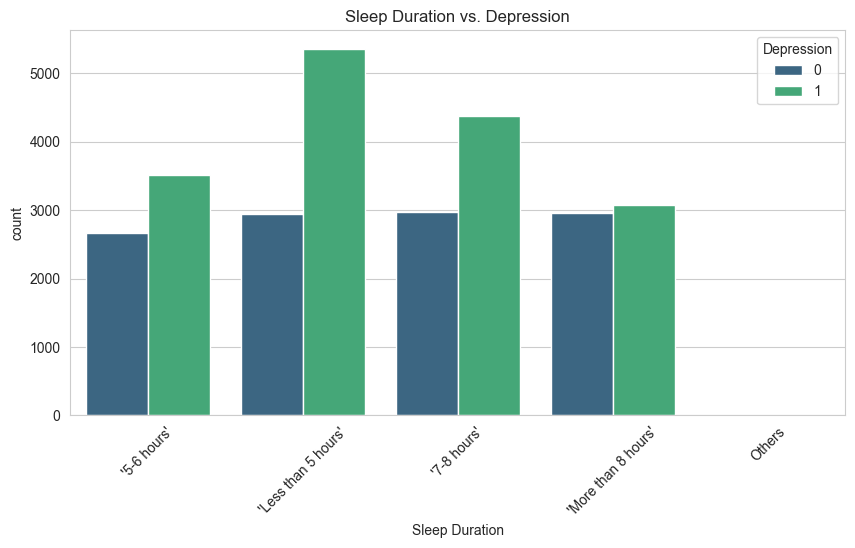

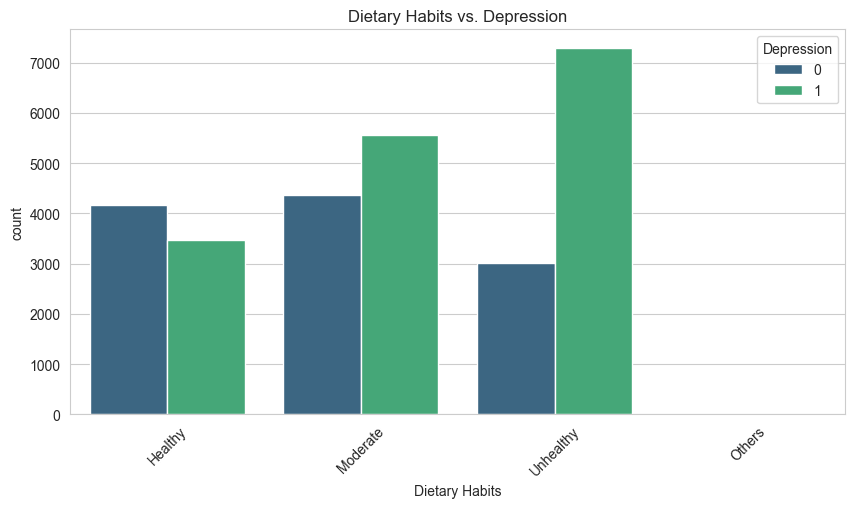

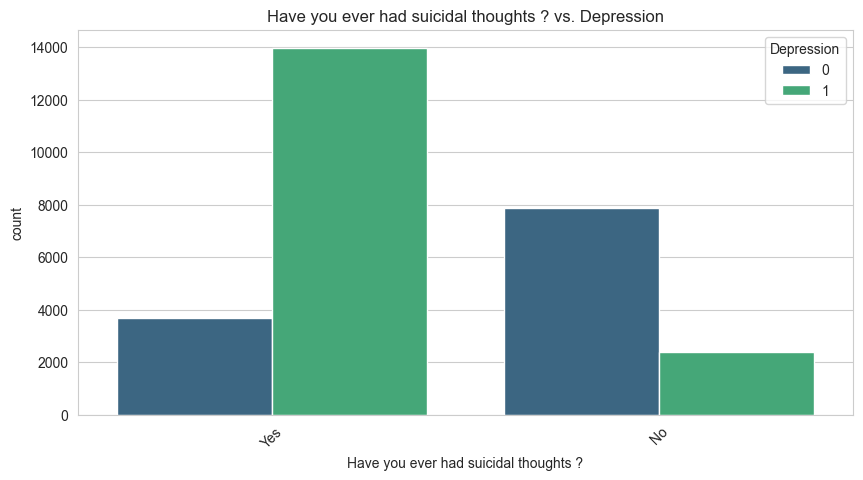

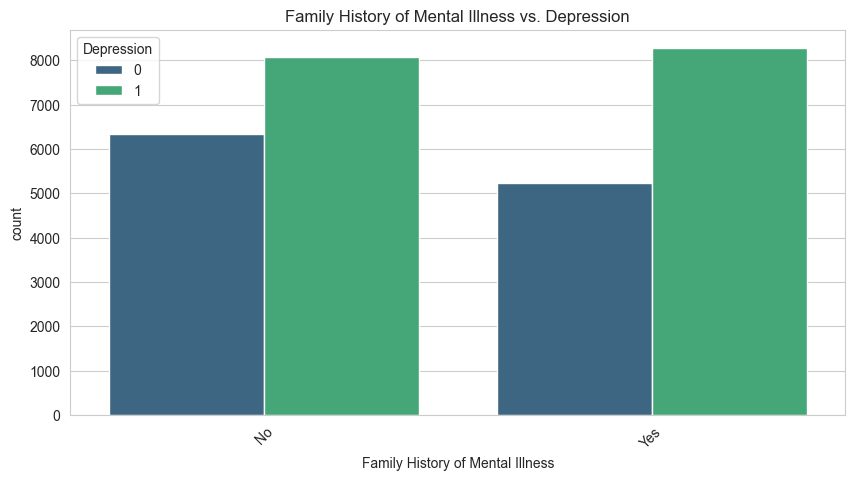

In [47]:
# Visualize relationships between categorical features and Depression
categorical_features = ['Gender', 'Sleep Duration', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=feature, hue='Depression', palette='viridis')
    plt.title(f'{feature} vs. Depression')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


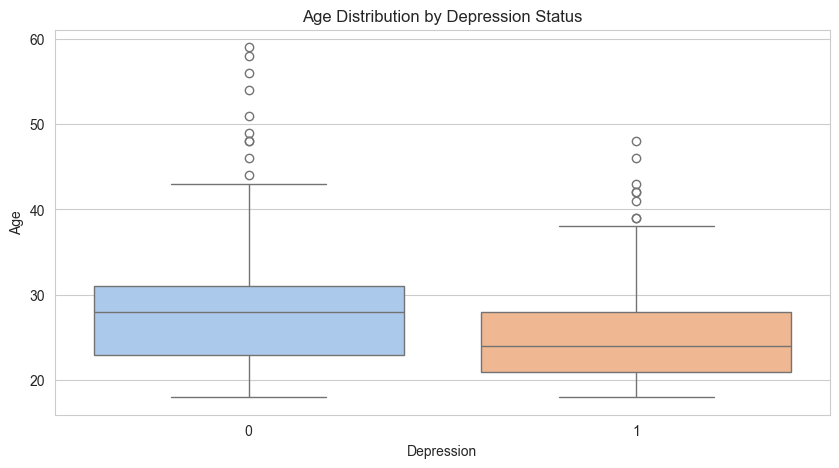

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


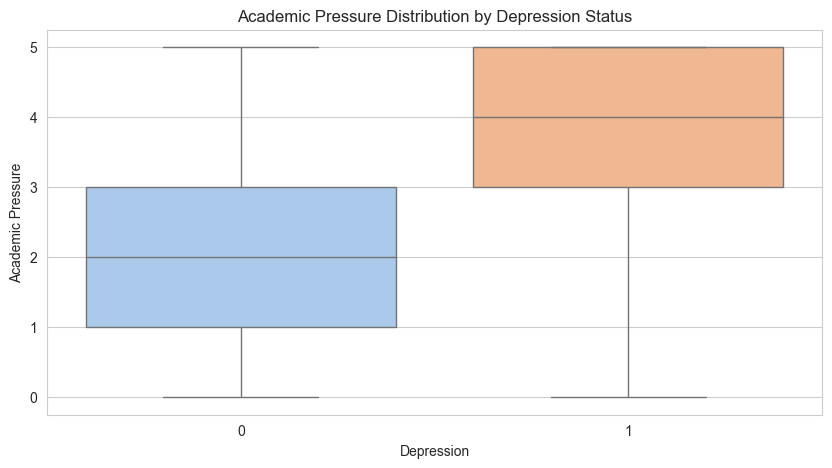

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


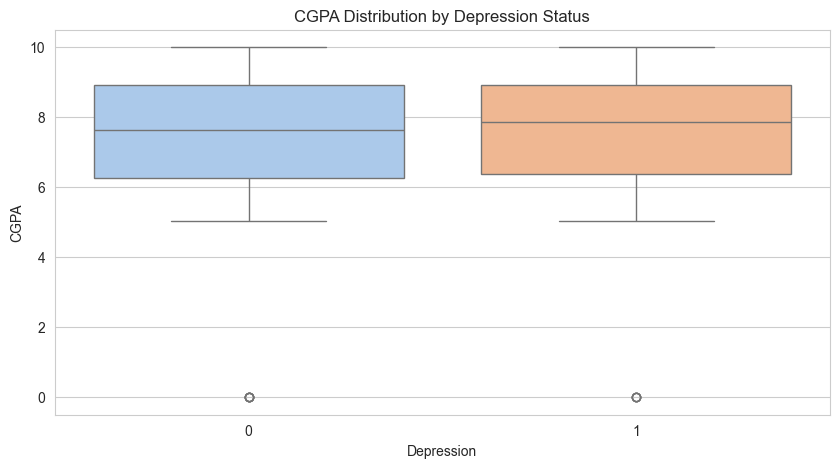

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


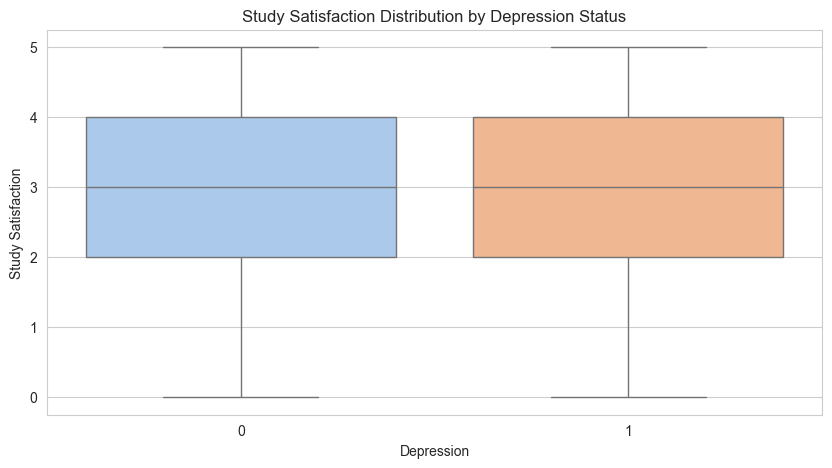

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


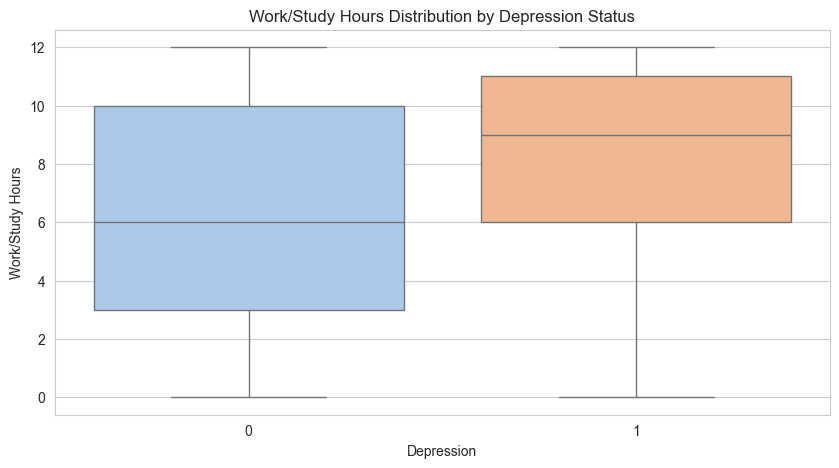

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\3294437064.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')


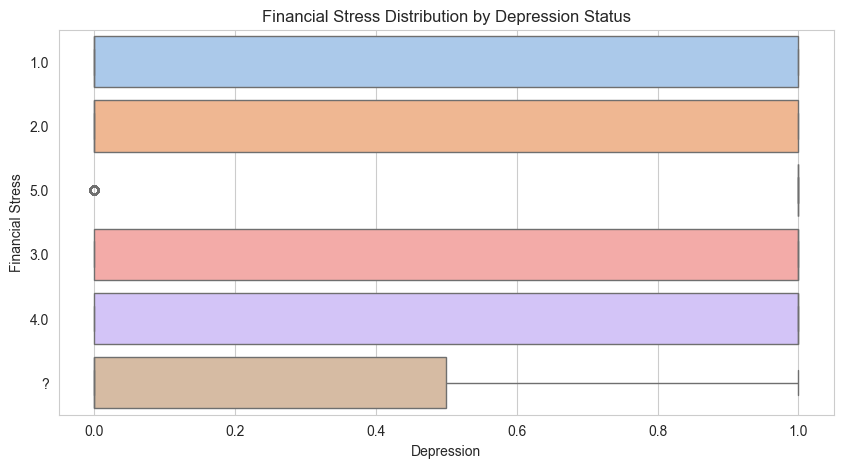

In [48]:
# Visualize relationships between numerical features and Depression
numerical_features = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, x='Depression', y=feature, palette='pastel')
    plt.title(f'{feature} Distribution by Depression Status')
    plt.show()

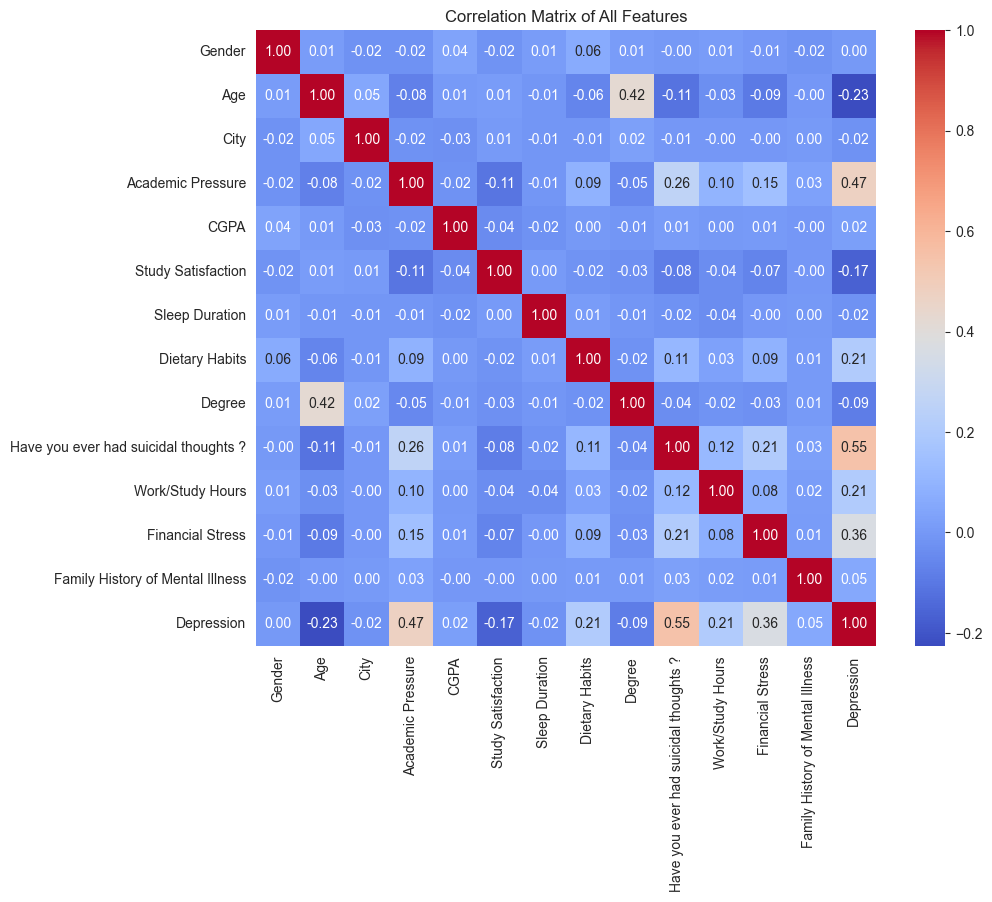

In [49]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
df_corr = df.copy()
for col in df_corr.columns:
    if df_corr[col].dtype == 'object':
        df_corr[col] = LabelEncoder().fit_transform(df_corr[col])
sns.heatmap(df_corr.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

# --- 3. Data Preprocessing (Reworked) ---

In [50]:
# Define features (X) and target (y)
X = df.drop('Depression', axis=1)
y = df['Depression']

# Handle Ordinal Feature: Sleep Duration
# This assumes a linear, ordered relationship.
sleep_map = {'Less than 5 hours': 0, '5-6 hours': 1, '7-8 hours': 2, 'More than 8 hours': 3}
X['Sleep Duration'] = X['Sleep Duration'].map(sleep_map).fillna(1) # Fill NaNs with the mode

# Identify categorical and numerical features for the pipeline
categorical_features_preproc = X.select_dtypes(include=['object']).columns
# Ensure 'Sleep Duration' is treated as numerical after mapping
numerical_features_preproc = X.select_dtypes(include=np.number).columns

# Create the preprocessing pipelines for numerical and categorical data
# StandardScaler standardizes features by removing the mean and scaling to unit variance.
numerical_transformer = StandardScaler()
# OneHotEncoder converts categorical features into a format that can be provided to ML algorithms.
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features_preproc),
        ('cat', categorical_transformer, categorical_features_preproc)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


--- 4. Model Training with Hyperparameter Tuning (Reworked) ---



--- Tuning and Evaluating: Logistic Regression ---
Best Score from Cross-Validation: 0.8466
Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1'}

Test Set Evaluation:
Accuracy: 0.8441

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2313
           1       0.86      0.88      0.87      3268

    accuracy                           0.84      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix:


c:\Myfiles\VSProjects\Python\PyMiniProj\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


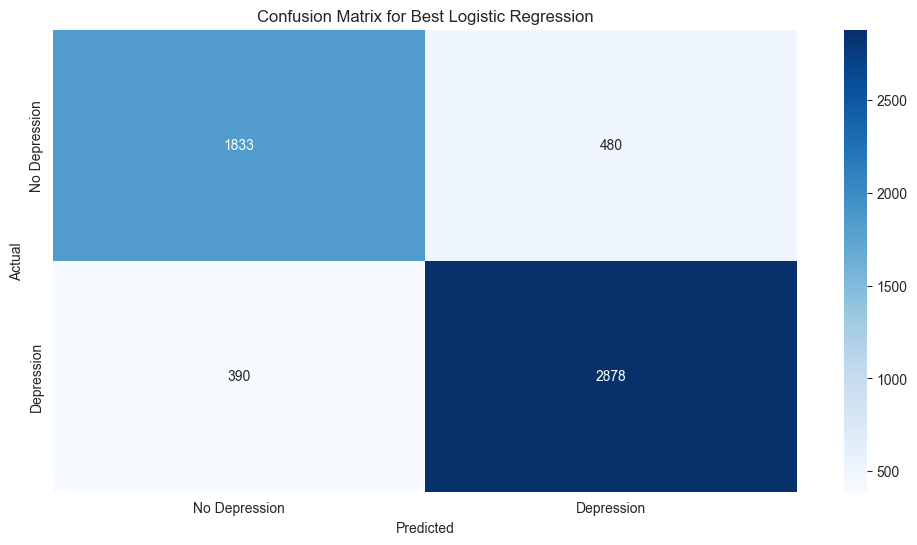


--- Tuning and Evaluating: Random Forest ---


c:\Myfiles\VSProjects\Python\PyMiniProj\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Score from Cross-Validation: 0.8418
Best Parameters: {'classifier__max_depth': 20, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}

Test Set Evaluation:
Accuracy: 0.8369

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.80      2313
           1       0.85      0.88      0.86      3268

    accuracy                           0.84      5581
   macro avg       0.83      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Confusion Matrix:


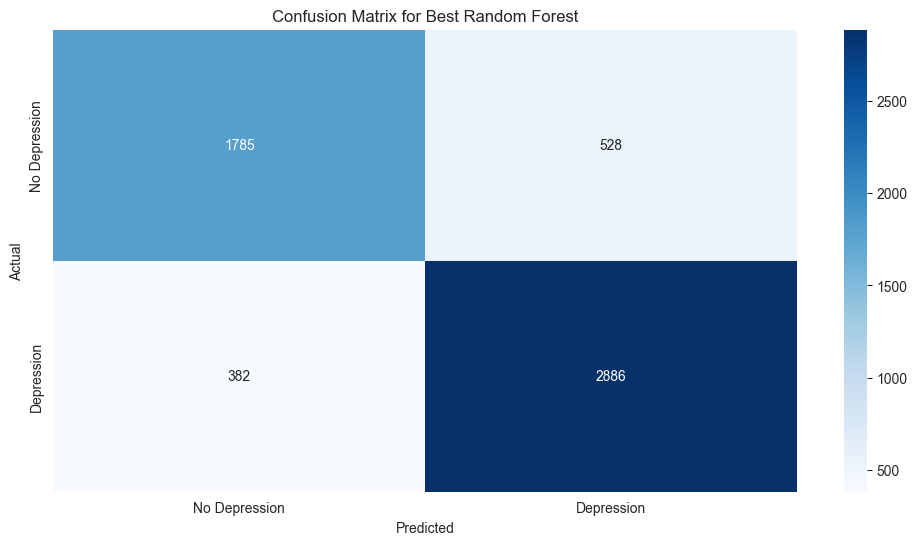


--- Tuning and Evaluating: XGBoost ---


c:\Myfiles\VSProjects\Python\PyMiniProj\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [12:48:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Myfiles\VSProjects\Python\PyMiniProj\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Best Score from Cross-Validation: 0.8466
Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 200}

Test Set Evaluation:
Accuracy: 0.8468

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2313
           1       0.86      0.89      0.87      3268

    accuracy                           0.85      5581
   macro avg       0.84      0.84      0.84      5581
weighted avg       0.85      0.85      0.85      5581

Confusion Matrix:


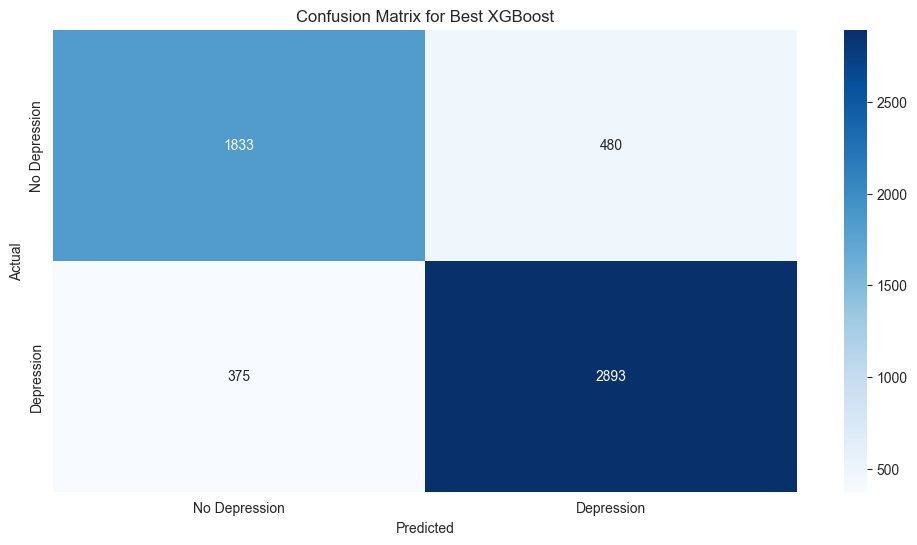

In [51]:
# Define models and their hyperparameter grids for GridSearchCV
models_and_params = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000, solver='liblinear'),
        "params": {
            "classifier__C": [0.01, 0.1, 1, 10, 100],
            "classifier__penalty": ["l1", "l2"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__max_depth": [None, 10, 20],
            "classifier__min_samples_split": [2, 5]
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {
            "classifier__n_estimators": [100, 200],
            "classifier__learning_rate": [0.01, 0.1],
            "classifier__max_depth": [3, 5, 7]
        }
    }
}

# Store results
results = {}

# Loop through models, create pipeline, perform grid search, and evaluate
for name, config in models_and_params.items():
    # Create the full pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', config["model"])])

    # Create GridSearchCV object
    # cv=3 means 3-fold cross-validation. n_jobs=-1 uses all available CPU cores.
    grid_search = GridSearchCV(pipeline, config["params"], cv=3, n_jobs=-1, scoring='accuracy')

    print(f"\n--- Tuning and Evaluating: {name} ---")
    # Train the model
    grid_search.fit(X_train, y_train)

    # Get the best estimator
    best_model = grid_search.best_estimator_
    results[name] = {'best_score': grid_search.best_score_, 'best_params': grid_search.best_params_}

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Evaluate the best model
    print(f"Best Score from Cross-Validation: {grid_search.best_score_:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print("\nTest Set Evaluation:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Depression', 'Depression'], yticklabels=['No Depression', 'Depression'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for Best {name}')
    plt.show()

# --- 5. Feature Importance from Best Random Forest Model (Reworked) ---

C:\Users\adity\AppData\Local\Temp\ipykernel_28588\2789767818.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='inferno')


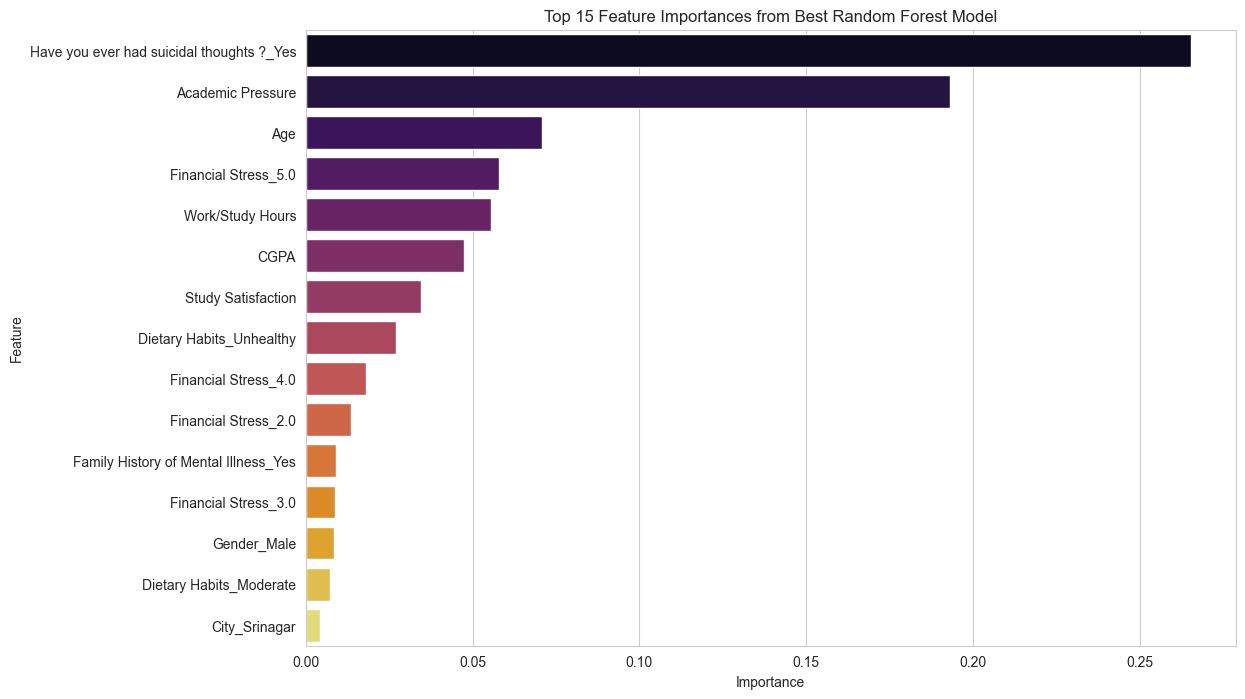

In [52]:
# Retrieve the best Random Forest pipeline from the grid search
best_rf_pipeline = GridSearchCV(
    Pipeline(steps=[('preprocessor', preprocessor), ('classifier', models_and_params['Random Forest']['model'])]),
    models_and_params['Random Forest']['params'],
    cv=3, n_jobs=-1, scoring='accuracy'
)
best_rf_pipeline.fit(X_train, y_train)

# Get feature names after one-hot encoding from the best model's preprocessor
ohe_feature_names = best_rf_pipeline.best_estimator_.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features_preproc)
all_feature_names = list(numerical_features_preproc) + list(ohe_feature_names)

# Get importances from the best model's classifier
importances = best_rf_pipeline.best_estimator_.named_steps['classifier'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='inferno')
plt.title('Top 15 Feature Importances from Best Random Forest Model')
plt.show()

